In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [46]:
#Load Dataset
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [47]:
# no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [48]:
# Rename- otherwise model will not take names
Data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

# Correlation

In [49]:
Data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

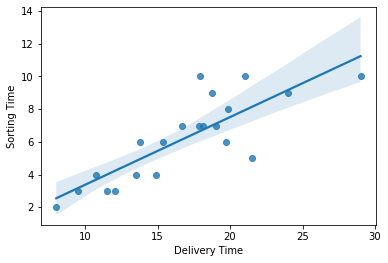

In [50]:
sns.regplot(x=data['Delivery Time'],y=data['Sorting Time'])

<AxesSubplot:>

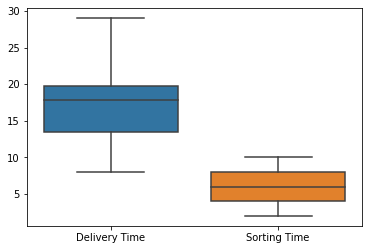

In [51]:
sns.boxplot(data=data)

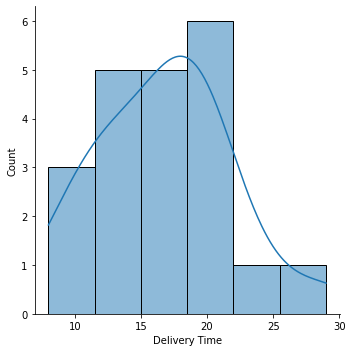

In [52]:
sns.displot(data['Delivery Time'],kde=True)

# Model Building

In [53]:
model=smf.ols('delivery_time~sorting_time',data=Data).fit()

In [54]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [55]:
# Find t_values and p_values
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [56]:
# find rsquared
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Log Transformation

In [57]:
model1=smf.ols('delivery_time~np.log(sorting_time)',data=Data).fit()

In [58]:
model1.tvalues,model1.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [59]:
(model1.rsquared,model1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

## Sqrt Transformation

In [60]:
model2=smf.ols('delivery_time~np.sqrt(sorting_time)',data=Data).fit()

In [61]:
model2.tvalues,model2.pvalues

(Intercept               -0.840911
 np.sqrt(sorting_time)    6.592434
 dtype: float64,
 Intercept                0.410857
 np.sqrt(sorting_time)    0.000003
 dtype: float64)

In [62]:
(model2.rsquared,model2.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

## Exponential Transformation

In [63]:
model3=smf.ols('np.log(delivery_time)~sorting_time',data=Data).fit()

In [64]:
model3.tvalues,model3.pvalues

(Intercept       20.601357
 sorting_time     6.836088
 dtype: float64,
 Intercept       1.857343e-14
 sorting_time    1.592708e-06
 dtype: float64)

In [65]:
(model3.rsquared,model3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

# Model pridiction

In [66]:
#Manual Model Pridiction 
#y=mx+c
#y=delivery time
#c=intercept
#m=Line gradient
#x=Sorting time
Delivery_time=(1.649020)*6+ 6.582734
Delivery_time

16.476854

In [67]:
# automatic Prediction
new_data=pd.Series([1,2,5,65,41])


In [68]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])

In [69]:
model2.predict(data_pred)

0     5.417754
1     8.705198
2    15.227920
3    61.468004
4    48.300140
dtype: float64

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           2.61e-06
Time:                        11:58:57   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""